In [1]:
import torch
import torchvision
import foolbox as fb
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import sys
sys.path.insert(1, '/home/acuzum/samproject/gen-attack/gen_attack/src/adversarial_attacks/')
from fgsm import FGSM
from visualize import visualize_images

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.resnet18(pretrained=True).to(device)
model = model.eval()

/home/acuzum/.cache/pypoetry/virtualenvs/gen-attack-o9djd8Dp-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/acuzum/.cache/pypoetry/virtualenvs/gen-attack-o9djd8Dp-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
bounds = (0, 1)
fmodel = fb.PyTorchModel(model, bounds=bounds, preprocessing=preprocessing)
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=16)
epsilons = np.linspace(0.0, 0.005, num=20)

<h1>FGSM

In [4]:
fgsm = FGSM(model)
accuracy, pred_labels, perturbed_images = fgsm.evaluate(images,labels,epsilons)

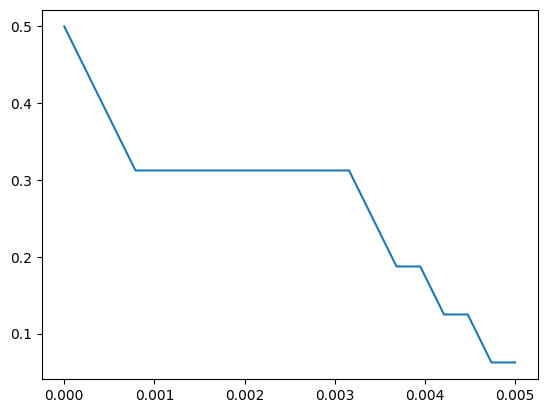

In [5]:
plt.plot(accuracy.keys(),accuracy.values())
plt.show()

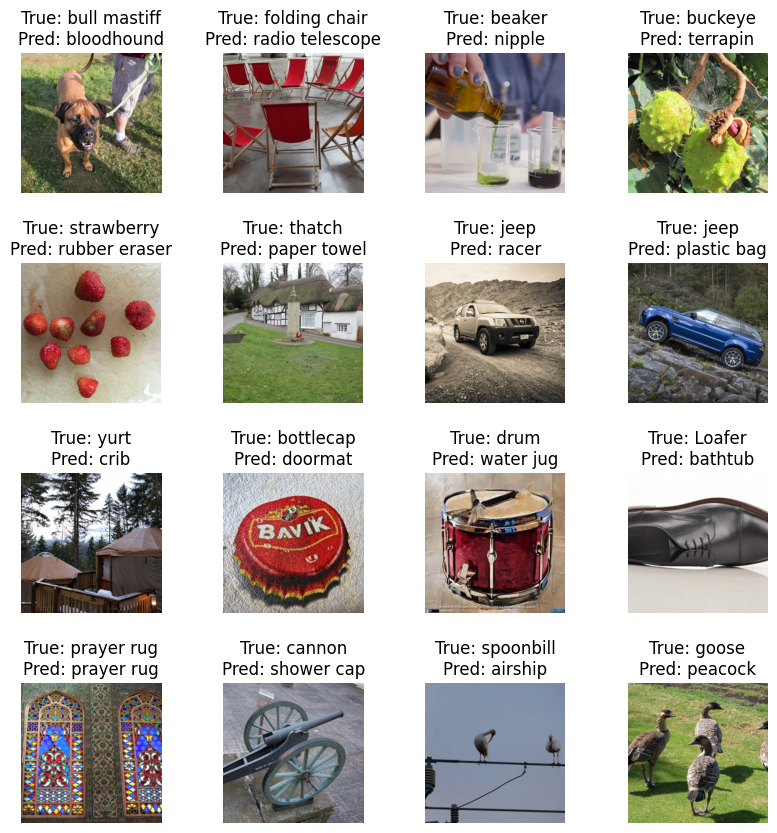

In [6]:
import json

with open('imagenet_class_names.txt') as f:
    classes = f.read()

classes = eval(classes)

visualize_images(perturbed_images,labels, list(pred_labels.values())[-1],classes)